In [1]:
import healpy



In [2]:
h = np.load('/data/GCE_sys/binned_photons_P8R2_tim_mask_psf3_HR.npy')

-c:3: RuntimeWarning: divide by zero encountered in log10


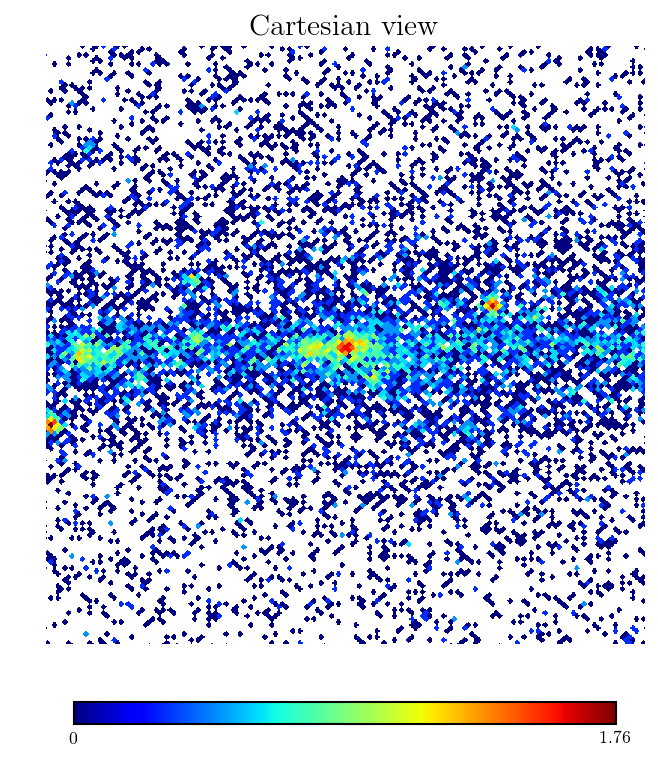

In [12]:

import Analysis
healpy.cartview(np.log10(h[14]), latra=[-7.5,7.5], lonra=[-7.5,7.5])

In [7]:
#h42 = pyfits.open('./new/mod_s_42_XCO_P8_corrected_ics_all_mapcube.fits')
h46 = pyfits.open('./new/mod_s_46_XCO_P8_corrected_ics_all_mapcube.fits')


(15, -15)

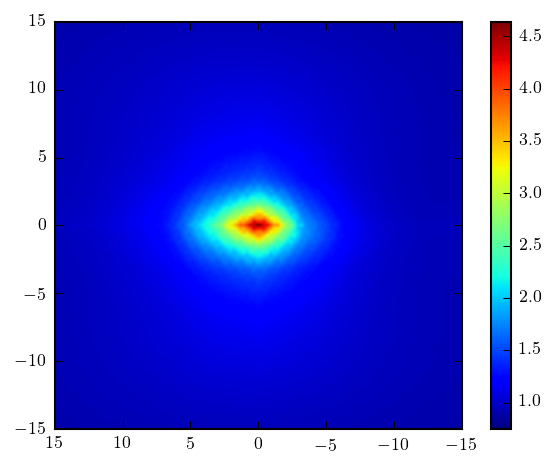

In [8]:
im = plt.imshow(h46[0].data[10]/h42[0].data[10], extent=[-180,180,-90,90])
plt.colorbar(im)
plt.ylim(-15, 15)
plt.xlim(15, -15)

Writing ics_all ['ics_cmb', 'ics_opt', 'ics_fir']
Adding template: ics_cmb
Adding template: ics_opt
Adding template: ics_fir
Writing pi0_brem ['pi0', 'brem']
Adding template: pi0
Adding template: brem


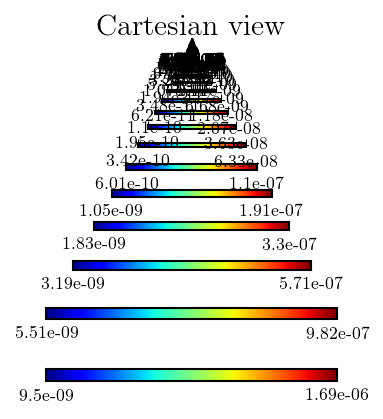

In [3]:
import h5py
import healpy

def Healpix2CartesianMerge(basedir, fname):
    # Read from hdf5 file
    f = h5py.File(basedir+fname,'r')


    output = { 'pi0_brem':['pi0','brem'],
               'ics_all':['ics_cmb','ics_opt','ics_fir'] }
    output_arrays = {}
    
    
    for k, v in output.items():
        print "Writing", k, v

        # Get the cartesian maps for each energy
        hpixcube=None
        for t in v:
            print 'Adding template:', t
            if hpixcube is None:
                hpixcube = f['templates/'+t][()]
            else:
                hpixcube += f['templates/'+t][()]

        cartcube = np.zeros((hpixcube.shape[0], 721,1440), dtype=np.float32)
        for i in range(hpixcube.shape[0]):
            cartcube[i] = healpy.cartview(hpixcube[i], hold=True, return_projected_map=True,
                                                  xsize=1440, lonra=[-179.875, 179.875],flip='geo')
            plt.gcf()
        
        output_arrays[k] = cartcube
        
        
        
    return output_arrays

ccubes = Healpix2CartesianMerge('/data/GCE_sys/new/', 'mod_s_46_XCO_P8_corrected.hdf5')


(15, -15)

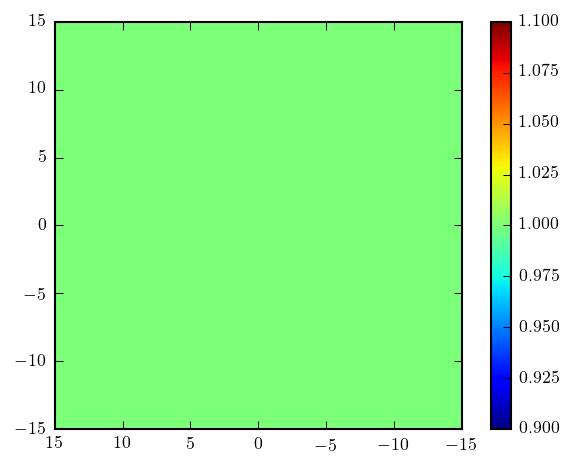

In [9]:
im = plt.imshow(h46[0].data[10]/ccubes['ics_all'][10], extent=[-180,180,-90,90])
plt.colorbar(im)
plt.ylim(-15, 15)
plt.xlim(15, -15)

(15, -15)

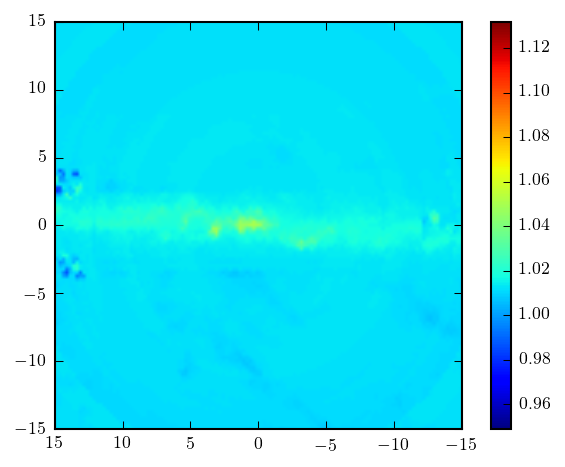

In [5]:
h46 = pyfits.open('./new/mod_s_46_XCO_P8_corrected_ics_all_mapcube.fits')

im = plt.imshow(h46[0].data[10]/ccubes['pi0_brem'][10], extent=[-180,180,-90,90])
plt.colorbar(im)
plt.ylim(-15, 15)
plt.xlim(15, -15)